In [2]:
from utils.train import * 
from utils.utils import *
from utils.evaluations import *
from models.debug_models import *
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import json

if __name__ == "__main__":
    config = {
    "model": AttnModel3d,
    "N": 5,
    "feature_dim": 3, # this the number of classes under different features set, e.g. dim = 3 for 0, 1, 2
    "emb_dim":6,
    "qkv_features":6,
    "out_features":6,
    "num_episodes": 500000,
    "mlp_hidden": 128,
    "batch_size": 500,
    "learning_rate": 0.0001,
    "num_agents": 12,
    "init_rng": 123,
    "train_rng": 456,
    "dropout_rng": 789,
    "eval_rng": 432,
    "num_heads": 1,
    "eval_runs":20,
    "batched_eval_runs":10,
    "eps_min":0.01,
    "eps_max":0.95,
    "K":25000,
    "eval_interval":10000,
    "save_result": True,
    "dropout":0.1
    }

    # batch_t_state_h, batch_t_state_g, sp_train_scores, xp_train_scores = train_agents_dropout(config)



2023-12-13 23:33:39.216976: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


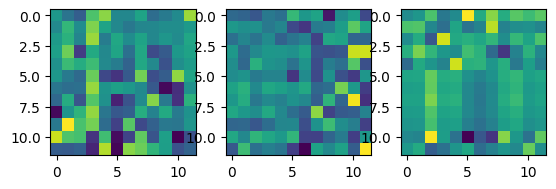

In [7]:
# model_name = "attn3-feature-qkv"
model_name = "attn3"
# currentDate = datetime.now().strftime("%Y-%m-%d")
date = "2023-11-14"
g_cp = load_trainstate(f"checkpoints/{date}/{model_name}/guesser_7")
Q = g_cp["params"]["attn"]["q_linear"]["kernel"]
K = g_cp["params"]["attn"]["k_linear"]["kernel"]
V = g_cp["params"]["attn"]["v_linear"]["kernel"]

fig, axs = plt.subplots(1, 3)
cax = axs[0].imshow(Q)
cax = axs[1].imshow(K.T)
cax = axs[2].imshow(V)
# cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 
# fig.colorbar(cax, cax=cbar_ax)
plt.show()


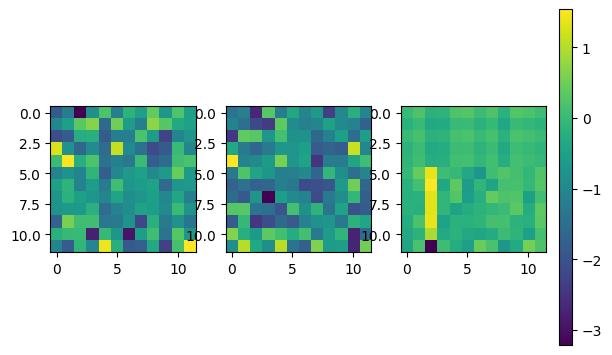

In [3]:
model_name = "attn3"
# model_name = "attn3-feature-qkv"
# currentDate = datetime.now().strftime("%Y-%m-%d")
date = "2023-11-14"
h_cp = load_trainstate(f"checkpoints/{date}/{model_name}/hinter_7")
Q = h_cp["params"]["attn"]["q_linear"]["kernel"]
K = h_cp["params"]["attn"]["k_linear"]["kernel"]
V = h_cp["params"]["attn"]["v_linear"]["kernel"]

fig, axs = plt.subplots(1, 3)
cax = axs[0].imshow(Q)
cax = axs[1].imshow(K.T)
cax = axs[2].imshow(V)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 
fig.colorbar(cax, cax=cbar_ax)
plt.show()

In [4]:
env = HintGuessEnv(config)
rng = jax.random.PRNGKey(0)
sp, h1, h2= env.get_observation(rng)

In [5]:
init_sp, init_h1, init_h2, hinter, guesser = init_model(config)
t_state_h = create_train_state(hinter, init_sp, init_h1, init_h2, rng, 0.0001, h_cp["params"], rng)
q_values, similarities, attn, q, k, v = t_state_h.apply_fn({"params": t_state_h.params}, sp, h2, h1, training=False, rngs={'dropout': rng})


[[0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
 [1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


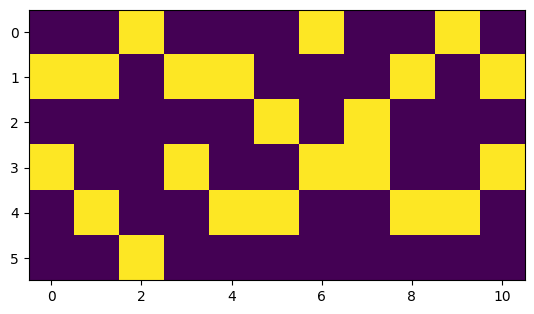

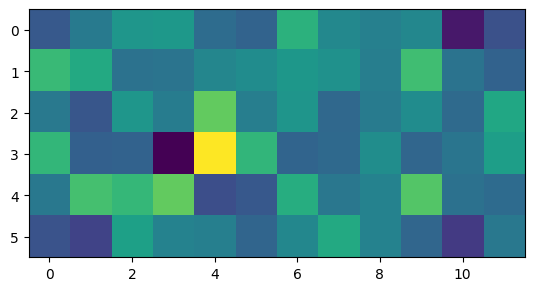

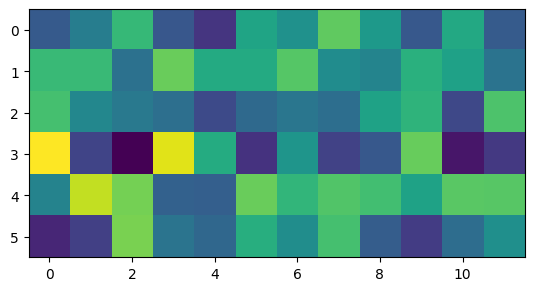

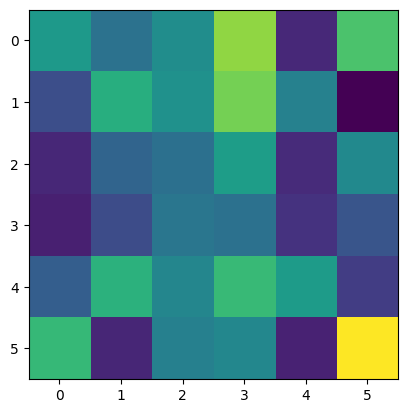

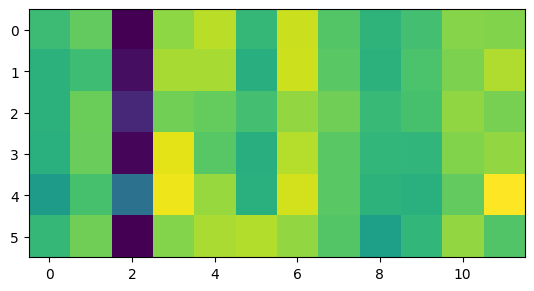

In [14]:
bi = 0
action_id = jnp.argmax(q_values[bi])
# action_id = jnp.argmax(q_values[bi])
obs = jnp.concatenate([h2[bi], h1[bi], sp[jnp.newaxis, bi]], axis=0)
obs = obs.T
# print("h2:\n", h2[bi])
# print("h1:\n", h1[bi])
# print("target:\n", sp[bi])
# print("action card: ", h1[bi, action_id, :])
print(obs)
plt.figure(5)
plt.imshow(obs)
plt.figure(3)
plt.imshow(q[bi, action_id, :, :])
plt.figure(4)
plt.imshow(k[bi, action_id, :, :])
plt.figure(1)
plt.imshow(similarities[bi, action_id, :, :])
plt.figure(2)
plt.imshow(attn[bi, action_id, :, :])


In [4]:
a = jnp.arange(12).reshape(4, 3)
a @ a.T

Array([[  5,  14,  23,  32],
       [ 14,  50,  86, 122],
       [ 23,  86, 149, 212],
       [ 32, 122, 212, 302]], dtype=int32)